# Nested Variational Compression for Deep GPs

## James Hensman and Neil D. Lawrence

### 8th May 2015

In this notebook we give a simple demonstration of the nested variational compression approach to deep Gaussian processes. First we perform some setup and load in the code. The deep GPs are currently released as an augmentation of our [GPy](http://github.com/SheffieldML/GPy) software. First of all we import that software and some files for running deep GPs. 

In [1]:
import GPy 

from coldeep import ColDeep
from coldeep import build_supervised
from layers import *

mpi not found


Next some plotting for the notebook.

In [2]:
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['figure.figsize'] = (12,6)
%matplotlib inline

## Non Gaussian Derivatives

Gaussian process models have Gaussian distributed derivatives. This means that they tend to struggle with approximating step functions, which have derivates which are either zero or infinite. [Duvenaud et al]() showed that as we increase the number of layers in the model the distribution over derivatives can become more heavy tailed. Let's examine this in practice by fitting the model to a step function.

In [3]:
np.random.seed(0)
n = 30 # number of data
d = 1  # number of dimensions
# dependent variable is linearly spaced.
X = np.linspace(0,1,n)[:,None]
# response variable is step function
Y = np.where(X>0.5, 1,0) + np.random.randn(n,1)*0.02
# where to plot the model predictions
Xtest = np.linspace(-1,2,500)[:,None]

### Modelling with a GP

Now we attempt to model the step function with a Gaussian process. Parameters are chosen by type-II maximum likelihood.

In [4]:
model0 = GPy.models.GPRegression(X,Y)
model0.optimize('bfgs', max_iters=1000, messages=1)

 :0: FutureWarning:IPython widgets are experimental and may change in the future.


We can plot the regression to see if it has managed to fit the data.

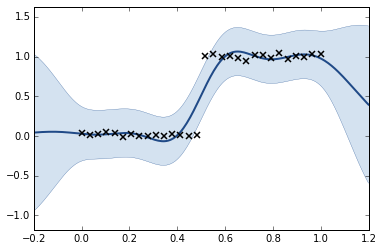

In [6]:
_ = model0.plot()

and we note that the model is overly smooth and results in a variance that is too high.

## Deep GP

Now we will consider a deep Gaussian process. Firstly, we'll set up some model parameters and a helper

We can't plot the direct output of the deep GP, so we'll use Monte Carlo sampling. To aid comparison, we first plot the Monte Carlo samples from the original GP.


### One Hidden Layer

For our first experiment we create a deep GP with one hidden layer. The model is easily constructed by creating different layer objects for the deep GP and then concatenating them.

In [7]:
model1 = build_supervised(X, Y, Qs=(1,), Ms=(15,15))

Now we optimize the model with the L-BFGS algorithm.

In [9]:
model1.optimize('bfgs', max_iters=1000, messages=1)

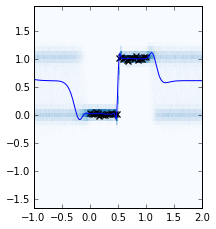

In [10]:
model1.plot(xlim=(-1, 2))

In [9]:
model2 = build_supervised(X, Y, Qs=(1,1), Ms=(15,15,15))
model2.optimize('bfgs', max_iters=1000, messages=1)

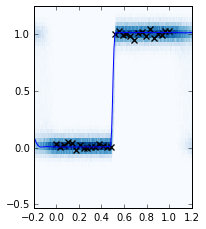

In [10]:
model2.plot((-1, 2))

## Three Hidden Layers

Finally we consider three hidden layers.

In [ ]:
model3 = build_supervised(X, Y, (2,2,2), (15, 15, 15, 15))
model3.optimize('bfgs', messages=1,max_iters=5000)

In [ ]:
model3.plot((-1, 2)))

## Between the Layers

We can also explore what's going on between layers by plotting each of the Gaussian processes. The plots show how the mapping function looks and how the inducing variables propagate through.

In [ ]:
for i in [0, 1, 2]:
    model.layers[i].plot()

## Example on Robot Wireless Data

In [ ]:
import pods
data = pods.datasets.robot_wireless()
data['X'].shape
Y = data['Y']
n = Y.shape[0]
t = np.linspace(0, n-1, n)[:, None]

In [ ]:
model = build_supervised(t, Y, (2,15), (40, 40, 40))
model.optimize(messages=True)